# Box (Box-and-Whisker) Plots

Method of showing aggregate statistics of various samples in a concise manner.  
The box plot simultaneously shows, for each sample, the median of each value, the minimum and maximum of the samples, and the interquartile range.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:

# create 3 samples with different distribution
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [3]:
# to see summary statistics about created dataframe
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.009602,0.498369,1.984696
std,0.997971,0.289102,1.420037
min,-3.919191,0.000177,0.011773
25%,-0.685918,0.247485,0.955454
50%,-0.006839,0.492212,1.647320
75%,0.661284,0.748372,2.679745
max,4.084369,0.999889,15.866834


In a box plot, the mean or the median of the data is plotted as a straight line. Two boxes are formed - one above represents the 50% to 75% data group, and one below represents the 25% to 50% data group. Thin lines are drawn out to the min and max values.

/tmp/ipykernel_8762/1941987582.py:3: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  _ = plt.boxplot(df['normal'], whis='range')


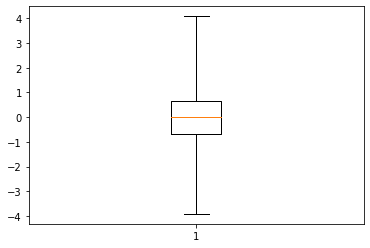

In [4]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis='range')
# whis parameter tells the box to set the whisker values all the way out to the min and max values

/tmp/ipykernel_8762/420904523.py:5: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  _ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')


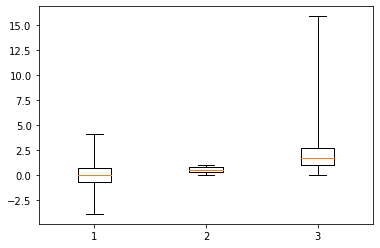

In [5]:
# # clear the current figure
# plt.clf()

# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# we can't just pass a whole pandas df to matplotlib, 
# instead we need to pull out each column and send them as a list of values

# note, that we didn't normalize the scale

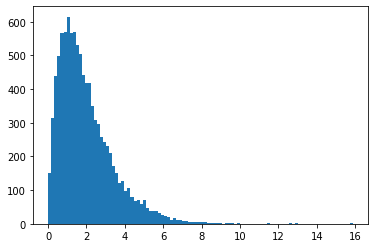

In [6]:
# create a histogram for a dataset with gamma distribution
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

We can overlay an axes on top of another within a figure, using mpl_toolkits package

/tmp/ipykernel_8762/2780246650.py:4: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')


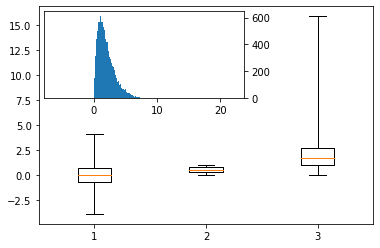

In [7]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

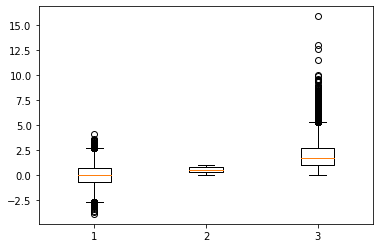

In [8]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

# this is one method of detecting outliers, the points which are plotted beyond the whiskers are called fliers
